In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# file paths and merge
df = pd.read_csv('NetflixData/NetflixData.csv')
df_1=pd.read_csv('HBOData/HBOData.csv')
df_2=pd.read_csv('AmazonPrimeData/APData.csv')

merged_df=pd.concat([df, df_1, df_2], ignore_index=True)


merged_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,Netflix
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,Netflix
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,Netflix
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,Netflix
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,Netflix


In [2]:
new_column_names = {'Age Certification': 'Rating',
                   }
merged_df.columns = merged_df.columns.str.title().str.replace('_', ' ')

merged_df.rename(columns=new_column_names, inplace=True)

merged_df.head()

,Id,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Id,Imdb Score,Imdb Votes,Tmdb Popularity,Tmdb Score,Platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN,Netflix
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782,Netflix
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406,Netflix
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020,Netflix
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246,Netflix


In [3]:
columns_deleted = ['Id', 'Imdb Votes', 'Imdb Id', 'Tmdb Popularity']

merged_df.drop(columns = columns_deleted, inplace= True)

merged_df.head()

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,Netflix
1,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,8.1,7.782,Netflix
2,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,7.2,7.406,Netflix
3,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,8.3,8.020,Netflix
4,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,7.3,7.246,Netflix


In [4]:
#Trying to clean genres and then country column without manually editing the CSV files
#every time you change something, run script from the top 

#merged_df['Genres'] = merged_df['Genres'].str.replace('[', '')
#merged_df['Genres'] = merged_df['Genres'].str.replace(']', '')
#merged_df['Genres'] = merged_df['Genres'].str.replace("'", "")

#split into individual genres
#merged_df['Genres'] = merged_df['Genres'].str.split(', ')
#merged_df.head()

merged_df['Genres'] = merged_df['Genres'].str.strip("[]").str.replace("'", "")
merged_df['Production Countries'] = merged_df['Production Countries'].str.strip("[]").str.replace("'", "")

merged_df.head()



########REVIEW

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,Netflix
1,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"drama, sport",US,NaN,8.1,7.782,Netflix
2,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"romance, comedy",US,NaN,7.2,7.406,Netflix
3,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"crime, drama, comedy, music",US,NaN,8.3,8.020,Netflix
4,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"drama, sport",US,NaN,7.3,7.246,Netflix


In [5]:
#Trying to clean genres and then country column without manually editing the CSV files
#every time you change something, run script from the top 

#merged_df['Production Countries'] = merged_df['Production Countries'].str.replace('[', '')
#merged_df['Production Countries'] = merged_df['Production Countries'].str.replace(']', '')
#merged_df['Production Countries'] = merged_df['Production Countries'].str.replace("'", "")
#merged_df.head()

#split into individual genres
#merged_df['Production Countries'] = merged_df['Production Countries'].str.split(', ')
#merged_df.head()

########REVIEW

Top 20 Shows/Movies on Each Streaming Platform

In [6]:
#sorting to platform = Netflix
netflix_data_df = merged_df[merged_df['Platform']=='Netflix']
netflix_shows_df = netflix_data_df[netflix_data_df['Type']=='SHOW']
netflix_movies_df = netflix_data_df[netflix_data_df['Type']=='MOVIE']


In [7]:
#Netflix top 20 shows
netflix_top_shows_df = netflix_shows_df.sort_values(by='Imdb Score', ascending = False)

netflix_top_20_shows_df = netflix_top_shows_df.head(20)

custom_index= range(1,21)

netflix_top_20_shows_df.set_index(pd.Index(custom_index), inplace=True)
netflix_top_20_shows_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,78,,,1.0,9.6,NaN,Netflix
2,Crazy Delicious,SHOW,Everyday meals are turned into extraordinary c...,2017,NaN,47,reality,GB,1.0,9.6,7.500,Netflix
3,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"drama, comedy, crime, thriller",US,5.0,9.5,8.868,Netflix
4,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,"reality, scifi, family",,11.0,9.5,NaN,Netflix
5,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-PG,49,"drama, history",US,3.0,9.3,8.583,Netflix
6,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,"animation, action, family, fantasy",US,3.0,9.3,8.700,Netflix
7,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,documentation,GB,1.0,9.3,8.538,Netflix
8,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,71,"comedy, drama, family, romance",KR,1.0,9.2,8.652,Netflix
9,The Last Dance,SHOW,A 10-part documentary chronicling the untold s...,2020,TV-MA,50,"documentation, history, sport",US,1.0,9.1,8.202,Netflix
10,Story Time Book: Read-Along,SHOW,Kids can read along with illustrated books tha...,2022,TV-Y,31,animation,,1.0,9.1,NaN,Netflix


In [8]:
#Netflix top 20 movies
netflix_top_movies_df = netflix_movies_df.sort_values(by='Imdb Score', ascending = False)

netflix_top_20_movies_df = netflix_top_movies_df.head(20)

netflix_top_20_movies_df.set_index(pd.Index(custom_index), inplace= True)

netflix_top_20_movies_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime","GB, US",NaN,9.0,8.508,Netflix
2,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama","NZ, US",NaN,9.0,8.474,Netflix
3,Split at the Root,MOVIE,When a Guatemalan mother seeking asylum was se...,2022,NaN,96,documentation,US,NaN,8.9,NaN,Netflix
4,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,documentation,GB,NaN,8.9,8.500,Netflix
5,The Lord of the Rings: The Fellowship of the Ring,MOVIE,"Young hobbit Frodo Baggins, after inheriting a...",2001,PG-13,178,"fantasy, action, drama","NZ, US",NaN,8.8,8.394,Netflix
6,C/o Kancharapalem,MOVIE,From a schoolboy’s crush to a middle-aged bach...,2018,PG,152,drama,IN,NaN,8.8,7.500,Netflix
7,Nanpakal Nerathu Mayakkam,MOVIE,A group of Malayali travellers were returning ...,2023,NaN,107,"drama, comedy",IN,NaN,8.8,7.200,Netflix
8,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"comedy, drama, romance",US,NaN,8.8,8.479,Netflix
9,Chhota Bheem Neeli Pahaadi,MOVIE,"The kids are excited, as they have all planned...",2021,G,63,animation,,NaN,8.8,10.000,Netflix
10,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,179,"action, fantasy, drama","NZ, US",NaN,8.8,8.375,Netflix


In [9]:
#sorting to platform = Amazon Prime
amazon_data_df = merged_df[merged_df['Platform']=='Amazon Prime']
amazon_shows_df = amazon_data_df[amazon_data_df['Type']=='SHOW']
amazon_movies_df = amazon_data_df[amazon_data_df['Type']=='MOVIE']

In [10]:
#Amazon Prime top 20 shows
amazon_top_shows_df = amazon_shows_df.sort_values(by='Imdb Score', ascending = False)

amazon_top_20_shows_df = amazon_top_shows_df.head(20)

custom_index= range(1,21)

amazon_top_20_shows_df.set_index(pd.Index(custom_index), inplace=True)
amazon_top_20_shows_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,Water Helps the Blood Run,SHOW,"Five orphan girls from diverse backgrounds, ca...",2019,NaN,29,"comedy, drama",US,1.0,9.7,NaN,Amazon Prime
2,Life After,SHOW,So what happens to the players when their dail...,2022,NaN,23,sport,,1.0,9.5,NaN,Amazon Prime
3,Jinny's Kitchen,SHOW,"A spin-off of the Youn's Kitchen series, sched...",2023,NaN,97,reality,KR,1.0,9.4,6.000,Amazon Prime
4,Denis,SHOW,"Denis, or DenisDaily, is a Canadian YouTuber w...",2016,NaN,15,comedy,"US, FR",4.0,9.4,NaN,Amazon Prime
5,The Chosen,SHOW,The life of Christ through the eyes of those w...,2019,TV-PG,49,"drama, history",US,3.0,9.3,8.583,Amazon Prime
6,Subaru Launch Control,SHOW,Go behind closed doors with Subaru Motorsports...,2013,NaN,21,sport,US,4.0,9.3,NaN,Amazon Prime
7,Reply 1988,SHOW,A nostalgic trip back to the late 1980s throug...,2015,TV-14,71,"comedy, drama, family, romance",KR,1.0,9.2,8.652,Amazon Prime
8,Intentions,SHOW,Three former law students run an illegal opera...,2021,NaN,24,"comedy, drama",US,1.0,9.2,NaN,Amazon Prime
9,Daisy & the Gumboot Kids,SHOW,Daisy the mouse loves nature. In each episode ...,2021,NaN,6,family,US,4.0,9.2,NaN,Amazon Prime
10,Rules of Engagement,SHOW,Rules of Engagement is a comedy about the diff...,2007,TV-14,23,"comedy, drama, romance, thriller",US,7.0,9.2,7.200,Amazon Prime


In [11]:
#Amazon Prime top 20 movies
amazon_top_movies_df = amazon_movies_df.sort_values(by='Imdb Score', ascending = False)

amazon_top_20_movies_df = amazon_top_movies_df.head(20)

amazon_top_20_movies_df.set_index(pd.Index(custom_index), inplace= True)

amazon_top_20_movies_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,"history, action, drama",IN,NaN,9.9,5.200,Amazon Prime
2,Romeo & Juliet,MOVIE,"In Verona, bad blood between the Montague and ...",2013,PG-13,118,"drama, romance, european",GB,NaN,9.8,6.800,Amazon Prime
3,COD (Cash On Delivery),MOVIE,COD is a story about a jobless artist who hija...,2021,NaN,130,drama,,NaN,9.8,NaN,Amazon Prime
4,The 1975 'At Their Very Best' Live from Madiso...,MOVIE,In support of their fifth studio album 'Being ...,2022,NaN,124,"documentation, music",US,NaN,9.7,2.000,Amazon Prime
5,Last Resort,MOVIE,Two terminally ill hospice residents conspire ...,2022,R,92,drama,CA,NaN,9.7,NaN,Amazon Prime
6,Chhote Ustaad-Precaution Is Better Than Cure,MOVIE,"Chhote Ustad-precaution is better than cure, s...",2021,NaN,300,crime,,NaN,9.6,NaN,Amazon Prime
7,Suffer for Good,MOVIE,By teaching the sport he loves an aging boxing...,2020,NaN,70,documentation,US,NaN,9.6,NaN,Amazon Prime
8,Yakov Smirnoff's Happily Ever Laughter : The N...,MOVIE,Fans who loved the comedy of Russian born ente...,2016,PG,60,comedy,US,NaN,9.3,NaN,Amazon Prime
9,Jai Bhim,MOVIE,A pregnant woman from a primitive tribal commu...,2021,NaN,164,"drama, thriller, crime",IN,NaN,9.3,7.500,Amazon Prime
10,Because We're Done,MOVIE,A married man going thru a mid life crisis bel...,2022,NaN,108,comedy,,NaN,9.3,NaN,Amazon Prime


In [12]:
#sorting to platform = HBO
hbo_data_df = merged_df[merged_df['Platform']=='HBO']
hbo_shows_df = hbo_data_df[hbo_data_df['Type']=='SHOW']
hbo_movies_df = hbo_data_df[hbo_data_df['Type']=='MOVIE']

In [13]:
#HBO top 20 shows
hbo_top_shows_df = hbo_shows_df.sort_values(by='Imdb Score', ascending = False)

hbo_top_20_shows_df = hbo_top_shows_df.head(20)

custom_index= range(1,21)

hbo_top_20_shows_df.set_index(pd.Index(custom_index), inplace=True)
hbo_top_20_shows_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,Chernobyl,SHOW,The true story of one of the worst man-made ca...,2019,TV-MA,65,"drama, thriller, history",US,1.0,9.4,8.600,HBO
2,Band of Brothers,SHOW,Drawn from interviews with survivors of Easy C...,2001,TV-MA,59,"drama, war, history, action",US,1.0,9.4,8.454,HBO
3,The Wire,SHOW,Told from the points of view of both the Balti...,2002,TV-MA,59,"drama, crime, thriller",US,5.0,9.3,8.501,HBO
4,The Sopranos,SHOW,The story of New Jersey-based Italian-American...,1999,TV-MA,55,"drama, crime",US,6.0,9.2,8.603,HBO
5,Eyes on the Prize,SHOW,The definitive story of the Civil Rights era f...,1987,TV-PG,57,"documentation, history",US,2.0,9.2,8.500,HBO
6,Game of Thrones,SHOW,Seven noble families fight for control of the ...,2011,TV-MA,58,"scifi, drama, action, romance, fantasy",US,8.0,9.2,8.400,HBO
7,The Last of Us,SHOW,Twenty years after modern civilization has bee...,2023,TV-MA,60,"drama, action, horror, scifi, thriller",US,1.0,9.1,8.798,HBO
8,Homegrown,SHOW,Jamila Norman helps families turn their backya...,2021,NaN,24,"documentation, drama",US,3.0,9.1,NaN,HBO
9,Rick and Morty,SHOW,Rick is a mentally-unbalanced but scientifical...,2013,TV-MA,22,"animation, scifi, action, comedy",US,6.0,9.1,8.729,HBO
10,Batman: The Animated Series,SHOW,The Dark Knight battles crime in Gotham City w...,1992,TV-Y7-FV,22,"family, scifi, animation, action, crime, drama",US,4.0,9.0,8.489,HBO


In [14]:
#HBO top 20 movies
hbo_top_movies_df = hbo_movies_df.sort_values(by='Imdb Score', ascending = False)

hbo_top_20_movies_df = hbo_top_movies_df.head(20)

hbo_top_20_movies_df.set_index(pd.Index(custom_index), inplace= True)

hbo_top_20_movies_df

,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform
1,The Shawshank Redemption,MOVIE,Framed in the 1940s for the double murder of h...,1994,R,143,drama,US,NaN,9.3,8.702,HBO
2,Celebrity Habla,MOVIE,"See what celebrated Latino actors, newsmakers ...",2009,PG,53,documentation,US,NaN,9.3,NaN,HBO
3,Emergency Contact,MOVIE,Can 30-something Roxanna Biltmore handle the m...,2015,NaN,54,comedy,US,NaN,9.2,NaN,HBO
4,The Dark Knight,MOVIE,Batman raises the stakes in his war on crime. ...,2008,PG-13,152,"drama, thriller, action, crime","GB, US",NaN,9.0,8.508,HBO
5,Euphoria: Trouble Don't Last Always,MOVIE,After changing her mind to run away with Jules...,2020,R,57,drama,US,NaN,9.0,10.000,HBO
6,The Lord of the Rings: The Return of the King,MOVIE,Aragorn is revealed as the heir to the ancient...,2003,PG-13,201,"fantasy, action, drama","NZ, US",NaN,9.0,8.474,HBO
7,Juan Luis Guerra 4.40: Entre Mar y Palmeras,MOVIE,"The renowned Dominican composer, musician, pro...",2021,PG,70,music,DO,NaN,8.9,8.300,HBO
8,The Lord of the Rings: The Two Towers,MOVIE,Frodo and Sam are trekking to Mordor to destro...,2002,PG-13,179,"action, fantasy, drama","NZ, US",NaN,8.8,8.375,HBO
9,Celebrity Habla 2,MOVIE,"See what celebrated Latino actors, newsmakers ...",2010,PG,58,documentation,US,NaN,8.8,NaN,HBO
10,Euphoria: F*ck Anyone Who’s Not A Sea Blob,MOVIE,"Over the Christmas holiday, Jules reflects on ...",2021,R,55,drama,US,NaN,8.8,10.000,HBO


In [15]:
#Printing output files of the top 20 as pictures (/output_files/top20/...)
#Netflix
netflix_top_path = "output_files/top20/Netflix/"
netflix_top_20_shows_df.to_csv(netflix_top_path + "netflix_top_20_shows.csv")
netflix_top_20_movies_df.to_csv(netflix_top_path + "netflix_top_20_movies.csv")

#Amazon Prime
amazon_top_path = "output_files/top20/Amazon Prime/"
amazon_top_20_shows_df.to_csv(amazon_top_path + "amazon_top_20_shows.csv")
amazon_top_20_movies_df.to_csv(amazon_top_path + "amazon_top_20_movies.csv")

#HBO
hbo_top_path = "output_files/top20/HBO/"
hbo_top_20_shows_df.to_csv(hbo_top_path + "hbo_top_20_shows.csv")
hbo_top_20_movies_df.to_csv(hbo_top_path + "hbo_top_20_movies.csv")


Titles by Time Period for Each Streaming Platform

In [16]:
#BINNNING - Netflix
Year_bins = [0,1963,1973,1983,1993,2003,2013, 2018, 2023]
bin_labels=['Before 1964','1964 to 1973','1974 to 1983', '1984 to 1993', '1994 to 2003','2004 to 2013','2014 to 2018', '2019 to 2023']

pd.cut(netflix_data_df['Release Year'], Year_bins, labels = bin_labels)


0        Before 1964
1       1974 to 1983
2       1974 to 1983
3       1964 to 1973
4       1974 to 1983
            ...     
6132    2019 to 2023
6133    2019 to 2023
6134    2019 to 2023
6135    2019 to 2023
6136    2019 to 2023
Name: Release Year, Length: 6137, dtype: category
Categories (8, object): ['Before 1964' < '1964 to 1973' < '1974 to 1983' < '1984 to 1993' < '1994 to 2003' < '2004 to 2013' < '2014 to 2018' < '2019 to 2023']

In [17]:
netflix_data_df['Time Period']=pd.cut(netflix_data_df['Release Year'], Year_bins, labels = bin_labels)

netflix_data_df.head()

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\928093264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['Time Period']=pd.cut(netflix_data_df['Release Year'], Year_bins, labels = bin_labels)


,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform,Time Period
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,NaN,NaN,Netflix,Before 1964
1,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"drama, sport",US,NaN,8.1,7.782,Netflix,1974 to 1983
2,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"romance, comedy",US,NaN,7.2,7.406,Netflix,1974 to 1983
3,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"crime, drama, comedy, music",US,NaN,8.3,8.020,Netflix,1964 to 1973
4,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"drama, sport",US,NaN,7.3,7.246,Netflix,1974 to 1983


In [18]:
time_period_counts_netflix = netflix_data_df['Time Period'].value_counts()
time_period_counts_netflix

Time Period
2019 to 2023    3497
2014 to 2018    1862
2004 to 2013     537
1994 to 2003     136
1984 to 1993      59
1974 to 1983      28
1964 to 1973      11
Before 1964        7
Name: count, dtype: int64

In [19]:
#Binning - Amazon
pd.cut(amazon_data_df['Release Year'], Year_bins, labels = bin_labels)

9167      Before 1964
9168      Before 1964
9169      Before 1964
9170      Before 1964
9171      Before 1964
             ...     
20035    2019 to 2023
20036    2019 to 2023
20037    2019 to 2023
20038    2019 to 2023
20039    2019 to 2023
Name: Release Year, Length: 10873, dtype: category
Categories (8, object): ['Before 1964' < '1964 to 1973' < '1974 to 1983' < '1984 to 1993' < '1994 to 2003' < '2004 to 2013' < '2014 to 2018' < '2019 to 2023']

In [20]:
amazon_data_df['Time Period']=pd.cut(amazon_data_df['Release Year'], Year_bins, labels = bin_labels)
amazon_data_df.head()

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\2560859749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data_df['Time Period']=pd.cut(amazon_data_df['Release Year'], Year_bins, labels = bin_labels)


,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform,Time Period
9167,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"drama, family, fantasy, romance, comedy",US,NaN,8.6,8.261,Amazon Prime,Before 1964
9168,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"comedy, war",US,NaN,7.8,7.357,Amazon Prime,Before 1964
9169,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"drama, romance, comedy",US,NaN,7.8,7.433,Amazon Prime,Before 1964
9170,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family",US,26.0,8.5,7.600,Amazon Prime,Before 1964
9171,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"western, drama, romance, action",US,NaN,7.8,7.400,Amazon Prime,Before 1964


In [21]:
time_period_counts_amazon = amazon_data_df['Time Period'].value_counts()
time_period_counts_amazon

Time Period
2019 to 2023    3477
2014 to 2018    2675
2004 to 2013    1890
Before 1964     1200
1994 to 2003     663
1984 to 1993     434
1964 to 1973     269
1974 to 1983     265
Name: count, dtype: int64

In [22]:
#Binning - HBO
pd.cut(hbo_data_df['Release Year'], Year_bins, labels = bin_labels)

6137     Before 1964
6138     Before 1964
6139     Before 1964
6140     Before 1964
6141     Before 1964
            ...     
9162    2019 to 2023
9163    2019 to 2023
9164    2019 to 2023
9165    2019 to 2023
9166    2019 to 2023
Name: Release Year, Length: 3030, dtype: category
Categories (8, object): ['Before 1964' < '1964 to 1973' < '1974 to 1983' < '1984 to 1993' < '1994 to 2003' < '2004 to 2013' < '2014 to 2018' < '2019 to 2023']

In [23]:
hbo_data_df['Time Period']=pd.cut(hbo_data_df['Release Year'], Year_bins, labels = bin_labels)
hbo_data_df.head()

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\352648140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbo_data_df['Time Period']=pd.cut(hbo_data_df['Release Year'], Year_bins, labels = bin_labels)


,Title,Type,Description,Release Year,Rating,Runtime,Genres,Production Countries,Seasons,Imdb Score,Tmdb Score,Platform,Time Period
6137,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"drama, romance, war",US,NaN,8.5,8.167,HBO,Before 1964
6138,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"fantasy, family",US,NaN,8.1,7.583,HBO,Before 1964
6139,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,drama,US,NaN,8.3,8.022,HBO,Before 1964
6140,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"drama, family, romance, music, comedy",US,NaN,7.5,7.000,HBO,Before 1964
6141,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"animation, comedy, family, action",US,16.0,7.7,10.000,HBO,Before 1964


In [24]:
time_period_counts_hbo = hbo_data_df['Time Period'].value_counts()
time_period_counts_hbo

Time Period
2019 to 2023    783
2004 to 2013    627
2014 to 2018    493
1994 to 2003    338
Before 1964     296
1984 to 1993    239
1964 to 1973    135
1974 to 1983    119
Name: count, dtype: int64

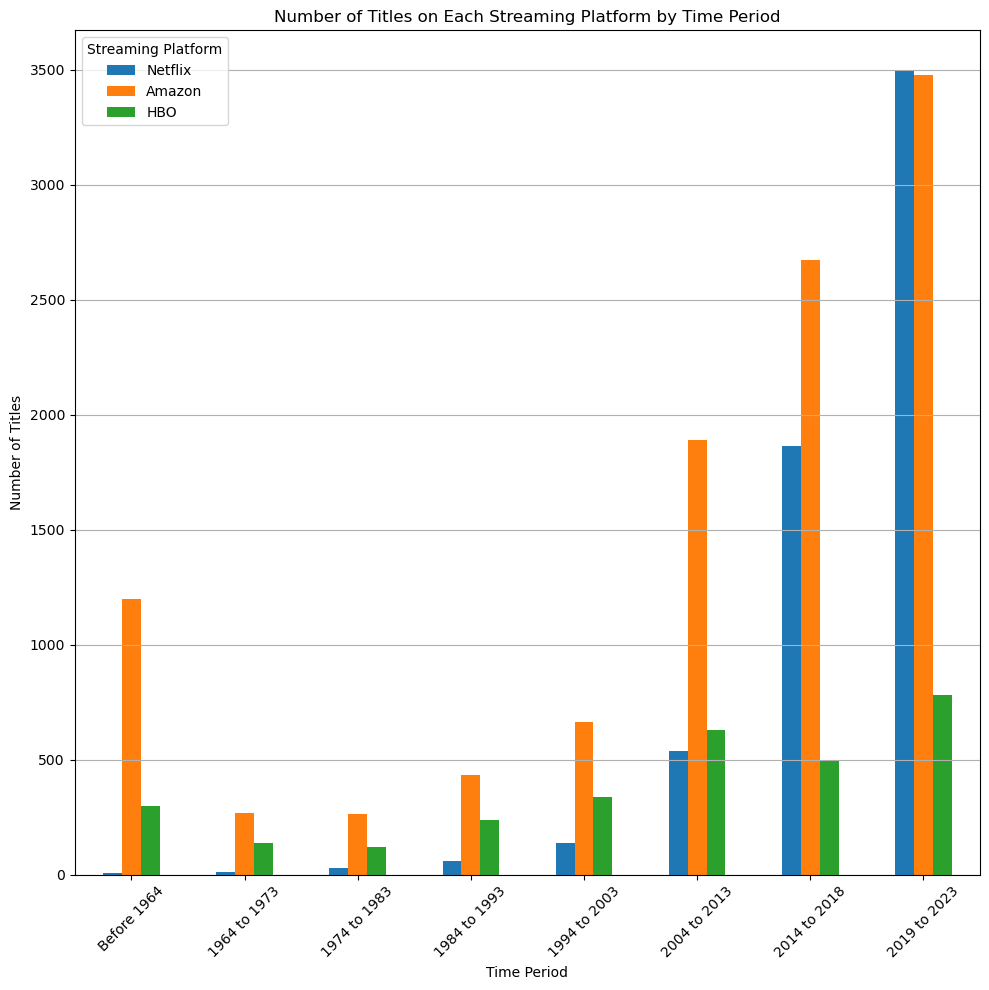

In [25]:
#charting time period counts
combined_period_counts_df = pd.DataFrame({
    'Netflix': time_period_counts_netflix,
    'Amazon': time_period_counts_amazon,
    'HBO': time_period_counts_hbo})#.fillna(0)

#plotting
combined_period_counts_df.plot(kind='bar', figsize=(10, 10))

# Customize the plot
plt.title('Number of Titles on Each Streaming Platform by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Streaming Platform')
plt.grid(True, axis='y')

period_count_path = "output_files/time_period/"
plt.savefig(period_count_path + "time_period_titles.png")

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Targeted Audience and Rating of Titles

In [26]:
#Rating Mapping
rating_mapping = {
    'TV-MA': 'Mature',
    'R': 'Mature',
    'TV-14': 'Teen',
    'PG-13': 'Teen',
    'PG': 'Family',
    'TV-PG': 'Family',
    'G': 'Family',
    'TV-Y7': "Children",
    'TV-Y': 'Children',
    'TV-G': 'Children',
    'NC-17': 'Mature',
    'TV-Y7-FV': 'Children'}


In [27]:
#Netflix platform (shows and movies)
netflix_data_df['Grouped Rating'] = netflix_data_df['Rating'].map(rating_mapping)
grouped_netflix_rating_counts = netflix_data_df['Grouped Rating'].value_counts()
grouped_netflix_rating_counts

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\2771066505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_df['Grouped Rating'] = netflix_data_df['Rating'].map(rating_mapping)


Grouped Rating
Mature      1534
Teen         942
Family       591
Children     327
Name: count, dtype: int64

In [28]:
#Amazon platform (shows and movies)
amazon_data_df['Grouped Rating'] = amazon_data_df['Rating'].map(rating_mapping)
grouped_amazon_rating_counts = amazon_data_df['Grouped Rating'].value_counts()
grouped_amazon_rating_counts

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\2282380257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data_df['Grouped Rating'] = amazon_data_df['Rating'].map(rating_mapping)


Grouped Rating
Mature      1594
Family       936
Teen         929
Children     229
Name: count, dtype: int64

In [29]:
#HBO platform (shows and movies)
hbo_data_df['Grouped Rating'] = hbo_data_df['Rating'].map(rating_mapping)
grouped_hbo_rating_counts = hbo_data_df['Grouped Rating'].value_counts()
grouped_hbo_rating_counts

C:\Users\nbmal\AppData\Local\Temp\ipykernel_13004\5364875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hbo_data_df['Grouped Rating'] = hbo_data_df['Rating'].map(rating_mapping)


Grouped Rating
Mature      914
Teen        513
Family      413
Children     71
Name: count, dtype: int64

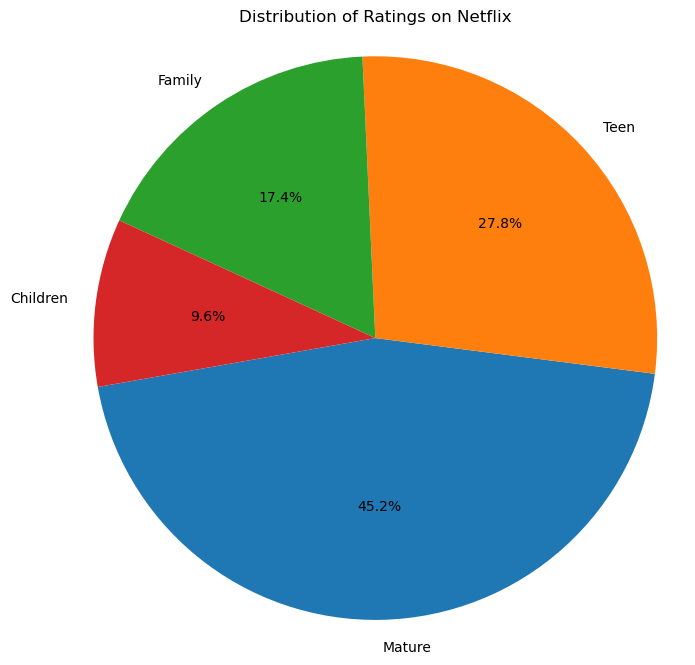

In [30]:
#total titles/ratings pie chart for netflix and save .png

plt.figure(figsize=(8, 8))
plt.pie(grouped_netflix_rating_counts, labels=grouped_netflix_rating_counts.index, autopct='%1.1f%%', 
        startangle=190)

plt.title('Distribution of Ratings on Netflix')

#ensures that pie is drawn as a circle
plt.axis('equal')

#save to output files
netflix_rating_path = "output_files/rating/Netflix/"
plt.savefig(netflix_rating_path + "netflix_rating_titles.png")

plt.show()

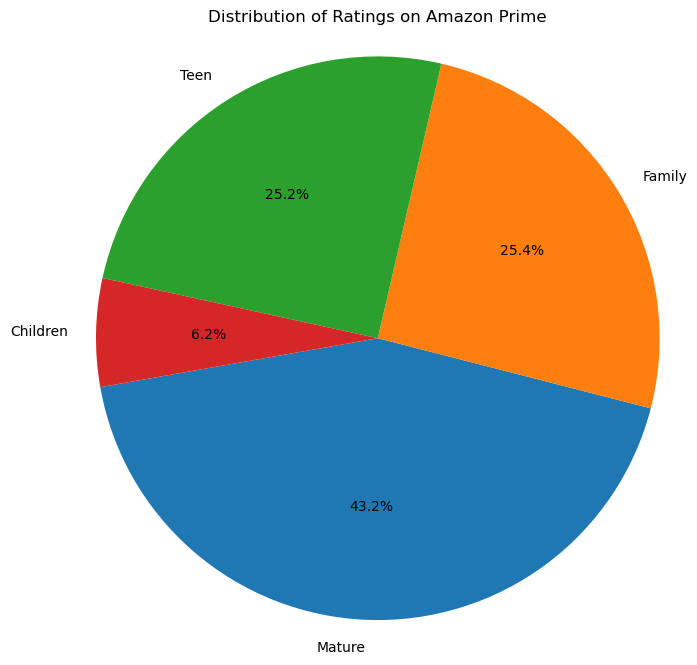

In [31]:
#total titles/ratings pie chart for amazon and save .png

plt.figure(figsize=(8, 8))
plt.pie(grouped_amazon_rating_counts, labels=grouped_amazon_rating_counts.index, autopct='%1.1f%%', startangle=190)

plt.title('Distribution of Ratings on Amazon Prime')

#ensures that pie is drawn as a circle
plt.axis('equal')

#save to output files
amazon_rating_path = "output_files/rating/Amazon Prime/"
plt.savefig(amazon_rating_path + "amazon_rating_titles.png")

plt.show()

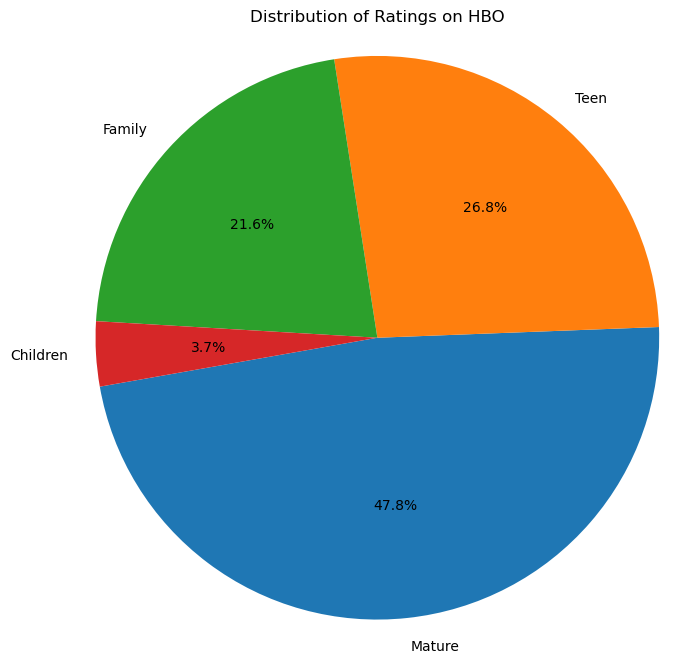

In [32]:
#total titles/ratings pie chart for hbo and save .png

plt.figure(figsize=(8, 8))
plt.pie(grouped_hbo_rating_counts, labels=grouped_hbo_rating_counts.index, autopct='%1.1f%%', startangle=190)

plt.title('Distribution of Ratings on HBO')

#ensures that pie is drawn as a circle
plt.axis('equal')

#save to output files
hbo_rating_path = "output_files/rating/HBO/"
plt.savefig(hbo_rating_path + "hbo_rating_titles.png")

plt.show()

Stats for both movies and TV show IMDB scores under each streaming platform

Summary Statistics for original merged data

In [33]:
#summary statistics per type per platform
agg_summary = merged_df.groupby(['Type', 'Platform'])['Imdb Score'].agg(['mean', 'median', 'min', 'max', 'var'])
agg_summary

mean  median  min  max       var
Type  Platform                                          
MOVIE Amazon Prime  5.782543     5.9  1.1  9.9  1.687205
      HBO           6.826382     7.0  2.5  9.3  0.926804
      Netflix       6.266761     6.4  1.5  9.0  1.204971
SHOW  Amazon Prime  7.142519     7.3  1.1  9.7  1.324329
      HBO           7.350173     7.5  1.5  9.4  1.152868
      Netflix       6.992067     7.1  1.9  9.6  1.104148

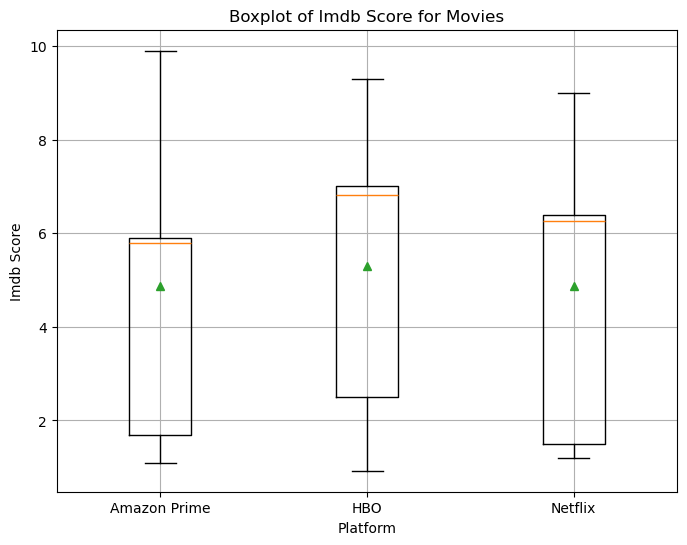

In [34]:
#box plot for Movies
movies_summary = agg_summary.loc['MOVIE']

#imdb scores for each platform
amazon_movie_scores = movies_summary.loc['Amazon Prime']
hbo_movie_scores = movies_summary.loc['HBO']
netflix_movie_scores = movies_summary.loc['Netflix']

#list of imdb scores for each platform
scores_movie = [amazon_movie_scores, hbo_movie_scores, netflix_movie_scores]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores_movie, labels=['Amazon Prime', 'HBO', 'Netflix'], showmeans=True)
plt.xlabel('Platform')
plt.ylabel('Imdb Score')
plt.title('Boxplot of Imdb Score for Movies')
plt.grid(True)
plt.show()

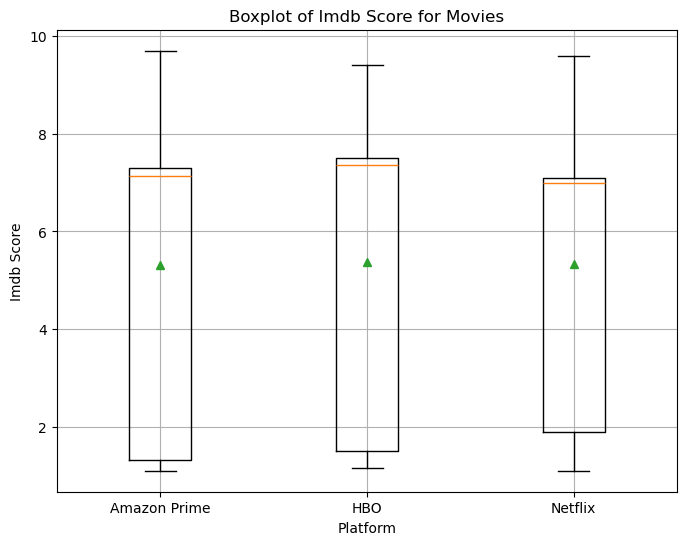

In [35]:
#box plot for TV shows
shows_summary = agg_summary.loc['SHOW']

#imdb scores for each platform
amazon_show_scores = shows_summary.loc['Amazon Prime']
hbo_show_scores = shows_summary.loc['HBO']
netflix_show_scores = shows_summary.loc['Netflix']

#list of imdb scores for each platform
scores_show = [amazon_show_scores, hbo_show_scores, netflix_show_scores]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(scores_show, labels=['Amazon Prime', 'HBO', 'Netflix'], showmeans=True)
plt.xlabel('Platform')
plt.ylabel('Imdb Score')
plt.title('Boxplot of Imdb Score for Movies')
plt.grid(True)
plt.show()

Genres (and Production countries plotting?)

In [36]:
#more data cleaning of genres and production countries
#Split comma-separated genres into individual genres and stack them into a Series
#genres_series = merged_df['Genres'].str.split(', ').apply(pd.Series).stack()
#countries_series = merged_df['Production Countries'].str.split(', ').apply(pd.Series).stack()


In [37]:
#more data cleaning of genres; Split comma-separated genres into individual genres and stack them into a Series
#genre counts for netflix
netflix_genre_data = netflix_data_df['Genres'].str.split(', ').apply(pd.Series).stack()
genre_counts_netflix = netflix_genre_data.value_counts()
#genre_counts_netflix

#dropping empy genre cells
genre_counts_netflix_cleaned = genre_counts_netflix[genre_counts_netflix.index != '']
genre_counts_netflix_cleaned

drama            3120
comedy           2485
thriller         1229
action           1140
romance          1054
documentation    1012
crime             956
animation         711
family            700
fantasy           662
scifi             597
european          381
horror            364
reality           278
history           275
music             266
sport             191
war               156
western            37
Name: count, dtype: int64

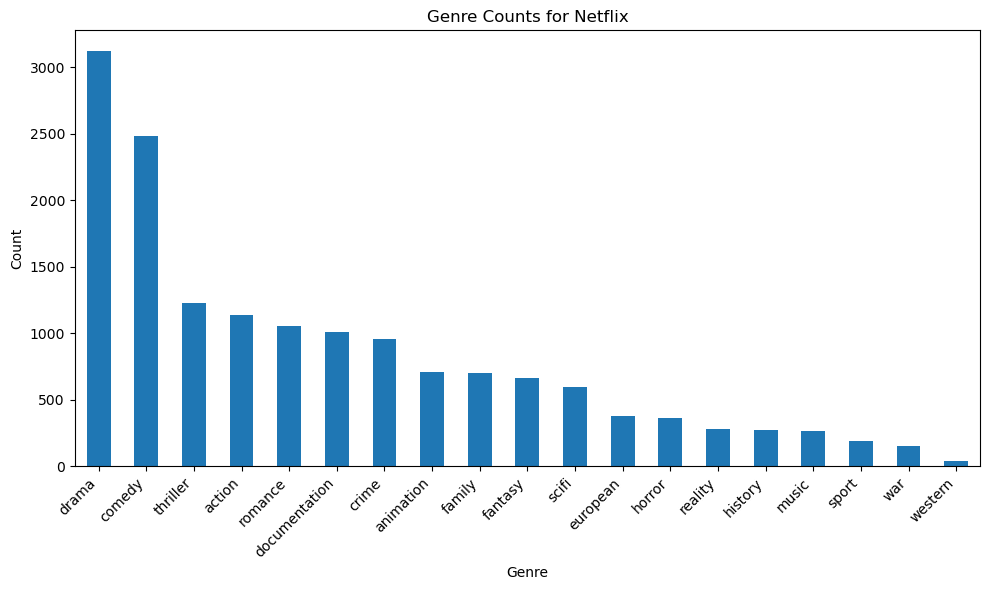

In [38]:
#Netflix plot
#if we want sorted abc use below line and change df variable in .plot
#sorted_genre_counts_netflix = genre_counts_netflix_cleaned.sort_index()
plt.figure(figsize=(10, 6))
genre_counts_netflix_cleaned.plot(kind='bar', color='tab:blue')
plt.title('Genre Counts for Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
#more data cleaning of genres; Split comma-separated genres into individual genres and stack them into a Series
#genre counts for Amazon
amazon_genre_data = amazon_data_df['Genres'].str.split(', ').apply(pd.Series).stack()
genre_counts_amazon = amazon_genre_data.value_counts()
#genre_counts_amazon

#dropping empy genre cells
genre_counts_amazon_cleaned = genre_counts_amazon[genre_counts_amazon.index != '']
genre_counts_amazon_cleaned

drama            5511
comedy           3349
thriller         2506
action           2062
romance          1860
crime            1402
documentation    1286
horror           1257
family            840
scifi             763
european          757
fantasy           632
animation         550
music             505
history           464
western           453
war               332
sport             276
reality           152
Name: count, dtype: int64

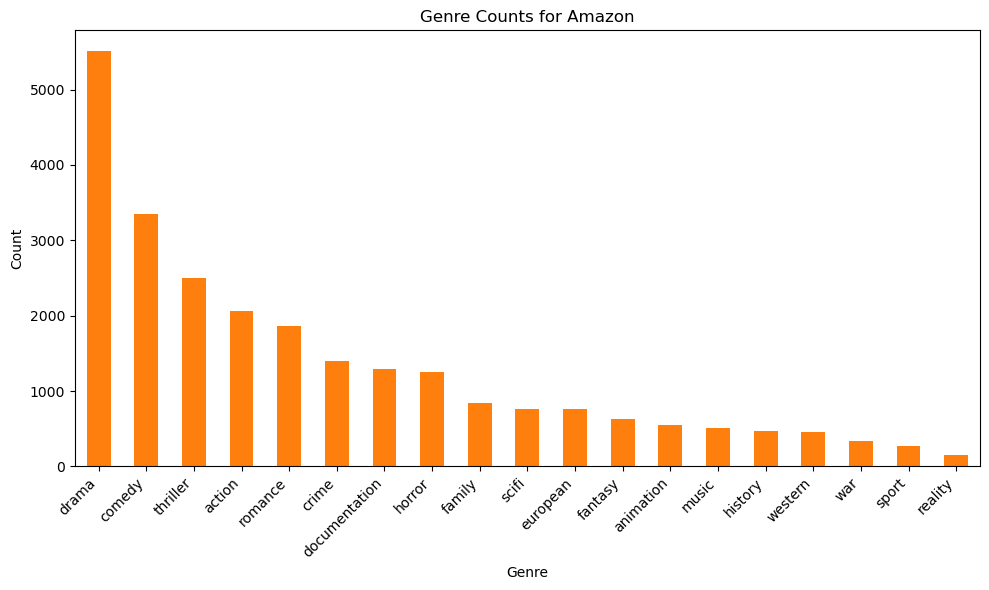

In [40]:
#Amazon plot
#if we want sorted abc use below line and change df variable in .plot
#sorted_genre_counts_amazon = genre_counts_amazon_cleaned.sort_index()
plt.figure(figsize=(10, 6))
genre_counts_amazon_cleaned.plot(kind='bar', color='tab:orange')
plt.title('Genre Counts for Amazon')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
#more data cleaning of genres; Split comma-separated genres into individual genres and stack them into a Series
#genre counts for HBO
hbo_genre_data = hbo_data_df['Genres'].str.split(', ').apply(pd.Series).stack()
genre_counts_hbo = hbo_genre_data.value_counts()
#genre_counts_hbo

#dropping empy genre cells
genre_counts_hbo_cleaned = genre_counts_hbo[genre_counts_hbo.index != '']
genre_counts_hbo_cleaned

drama            1356
comedy           1024
documentation     703
thriller          567
action            561
crime             478
romance           432
scifi             331
fantasy           319
european          318
animation         316
family            268
horror            196
history           194
music             156
war               123
sport             120
reality            69
western            47
Name: count, dtype: int64

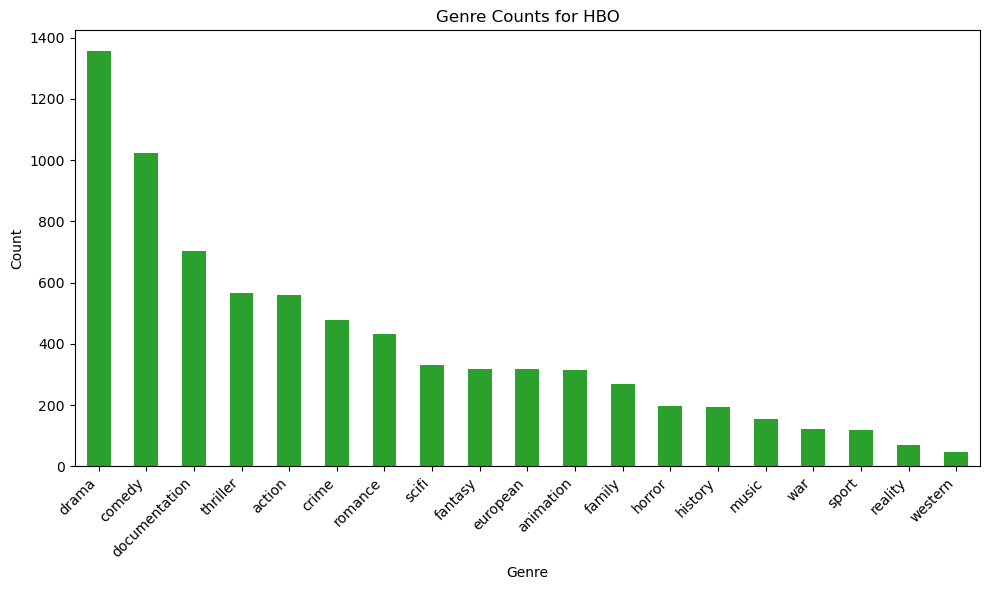

In [42]:
#HBO plot
#if we want sorted abc use below line and change df variable in .plot
#sorted_genre_counts_hbo = genre_counts_hbo_cleaned.sort_index()
plt.figure(figsize=(10, 6))
genre_counts_hbo_cleaned.plot(kind='bar', color='tab:green')
plt.title('Genre Counts for HBO')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

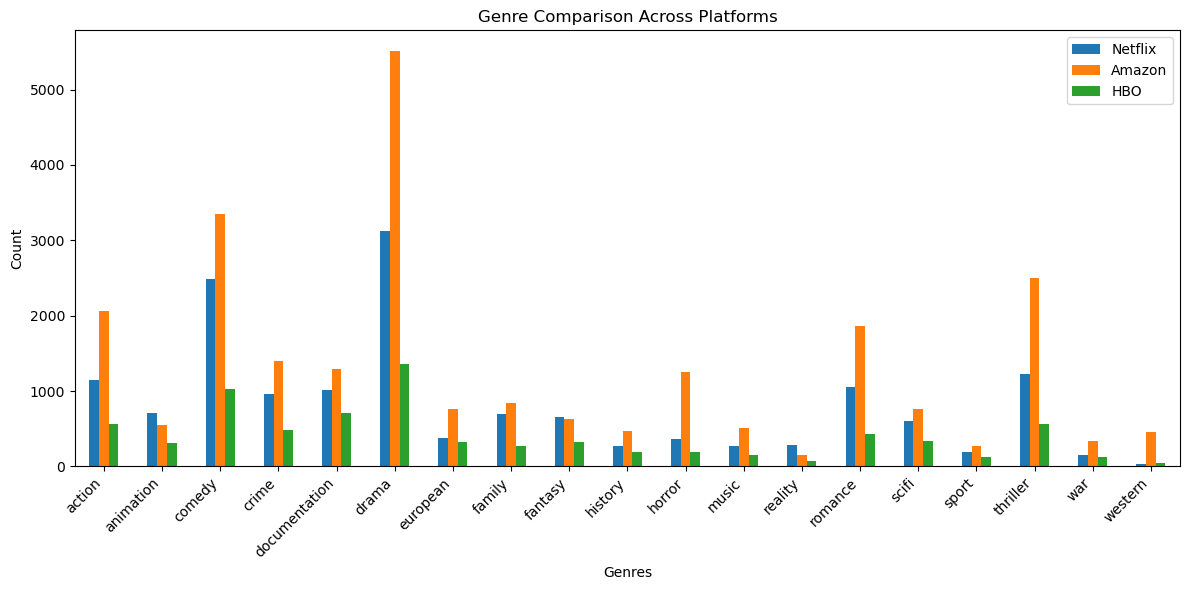

In [43]:
#Plotting genres across platforms
genre_comparison_df = pd.DataFrame({'Netflix': genre_counts_netflix_cleaned,
                                    'Amazon': genre_counts_amazon_cleaned,
                                    'HBO': genre_counts_hbo_cleaned})

genre_comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Genre Comparison Across Platforms')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [100]:
nan_value_columns = ['Seasons','Imdb Score']
netflix_linreg_df = netflix_top_shows_df.dropna(subset= nan_value_columns)
netflix_linreg_100 = netflix_linreg_df.head(100)

x=netflix_linreg_100[['Seasons']]
y=netflix_linreg_100['Imdb Score']

model=LinearRegression()
model.fit(x,y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
#predicts scores using the model may take out if proved unuseful
predicted_scores = model.predict(x)

Intercept: 8.773545168434548
Coefficient: -0.0033453782492131887


In [101]:
print("Imdb Score = {:.2f} + {:.2f} * Seasons".format(model.intercept_, model.coef_[0]))

Imdb Score = 8.77 + -0.00 * Seasons


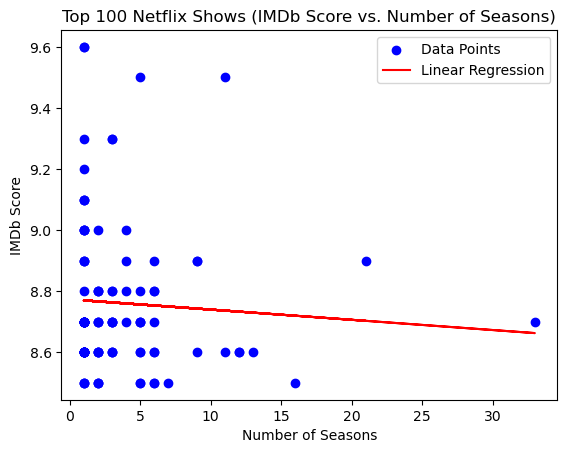

In [102]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Linear Regression')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDb Score')
plt.title('Top 100 Netflix Shows (IMDb Score vs. Number of Seasons)')
plt.legend()

plt.show()




In [103]:
nan_value_columns = ['Seasons','Imdb Score']
hbo_linreg_df = hbo_top_shows_df.dropna(subset= nan_value_columns)
hbo_linreg_100 = hbo_linreg_df.head(100)

x=hbo_linreg_100[['Seasons']]
y=hbo_linreg_100['Imdb Score']

model=LinearRegression()
model.fit(x,y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
#predicts scores using the model may take out if proved unuseful
predicted_scores = model.predict(x)

Intercept: 8.643283115815434
Coefficient: 0.0023553591614428084


In [104]:
print("Imdb Score = {:.2f} + {:.2f} * Seasons".format(model.intercept_, model.coef_[0]))

Imdb Score = 8.64 + 0.00 * Seasons


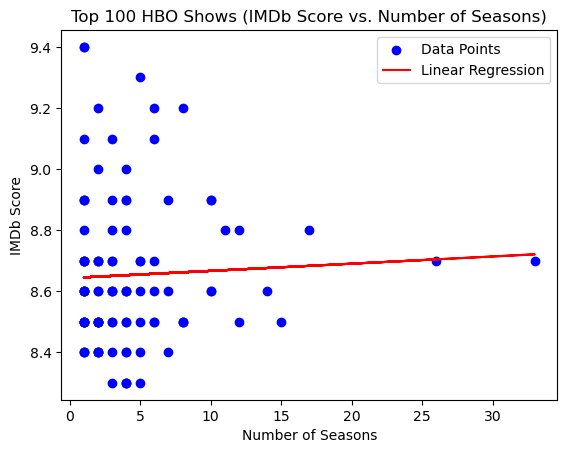

In [105]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Linear Regression')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDb Score')
plt.title('Top 100 HBO Shows (IMDb Score vs. Number of Seasons)')
plt.legend()

plt.show()

In [106]:
nan_value_columns = ['Seasons','Imdb Score']
amazon_linreg_df = amazon_top_shows_df.dropna(subset= nan_value_columns)
amazon_linreg_100 = amazon_linreg_df.head(100)

x=amazon_linreg_100[['Seasons']]
y=amazon_linreg_100['Imdb Score']

model=LinearRegression()
model.fit(x,y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
#predicts scores using the model may take out if proved unuseful
predicted_scores = model.predict(x)

Intercept: 8.780582772634688
Coefficient: -0.005562259269627686


In [107]:
print("Imdb Score = {:.2f} + {:.2f} * Seasons".format(model.intercept_, model.coef_[0]))

Imdb Score = 8.78 + -0.01 * Seasons


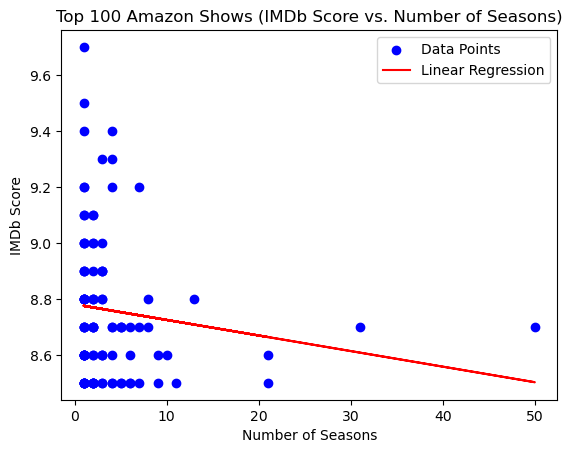

In [108]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x), color='red', label='Linear Regression')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDb Score')
plt.title('Top 100 Amazon Shows (IMDb Score vs. Number of Seasons)')
plt.legend()

plt.show()